### 🎯 High-level Objective

Build a secure Retrieval-Augmented Generation (RAG) agent that sits over internal company data (wiki pages, Slack logs, emails, spreadsheets). Employees can ask natural-language questions; the agent retrieves relevant documents, answers with citations, and optionally performs safe tool calls (schedule meeting, fetch a doc, search Slack). The project emphasizes security, explainability, and integration-ready design.

# 🧠 Enterprise Knowledge Agent for Private Data
### Secure Retrieval-Augmented Generation (RAG) System for Company Knowledge

---

## 📌 Overview

Welcome to the **Enterprise Knowledge Agent** — a next-generation RAG system designed to securely interface with an organization's **private data sources** like:
- 📘 Internal wiki pages  
- 💬 Slack logs and chat histories  
- 📧 Emails and meeting summaries  
- 📊 Excel sheets and reports  

Using the latest **LangChain**, **Groq LLM**, and **FAISS vector search**, this system enables employees to:
> Ask natural-language questions, get cited answers, and even trigger safe tool actions like scheduling meetings or locating files.

---

## 🧩 Key Features
- 🧾 **Multi-source ingestion:** Process text, markdown, emails, spreadsheets, and Slack logs.  
- 🔍 **Vectorized RAG retrieval:** Search semantically across your organization’s private corpus.  
- 🧠 **LLM reasoning with citation:** Each answer is backed by retrieved evidence.  
- ⚙️ **Secure tool integration:** Perform simulated safe actions (schedule, lookup, post).  
- 📊 **Interactive dashboards:** Visualize queries, sources, and confidence scores.  
- 🔐 **Privacy-first design:** Role-based behavior, redaction demos, and encryption simulation.

---

## 🧰 Tech Stack
- **LangChain** for orchestration  
- **Groq API** for LLM inference (`llama-3.1-8b-instant`)  
- **FAISS** for vector storage  
- **SentenceTransformers** for embeddings  
- **pandas**, **pdfplumber**, **plotly**, **spacy** for data handling and visualization  

---

## 💡 Expected Outcome
By the end of this project, you’ll have:
- A working **Enterprise RAG Agent** capable of answering employee-style queries  
- Fully cited responses with relevant document snippets  
- A foundation for integrating into **real-world enterprise environments**  

---

🧭 *Next Step → Install dependencies and verify environment setup.*


### Environment Setup

In [1]:
!pip install langchain langchain-community langchain-core faiss-cpu sentence-transformers pdfplumber plotly tqdm groq pillow langchain_groq pytesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of langchain-groq to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.5 MB/

### API Setup and TEST LLM Connection

In [2]:
import groq
from IPython.display import Markdown, display
import os
import random
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

from google.colab import userdata

import groq
from groq import Groq
from langchain_groq import ChatGroq


display(Markdown('API Setup'))


from google.colab import userdata

#Setup GROQ Api key
groq_api_key = userdata.get('GROQ_API_KEY')

if not groq_api_key:
  raise ValueError('Groq Api key not found. Please Recheck.')

#initialize GROQ Client
client = Groq(api_key=groq_api_key)

display(Markdown('API Setup Complete'))

import langchain
from langchain_core.messages import SystemMessage, HumanMessage


llm = ChatGroq(
    model='llama-3.1-8b-instant',
    groq_api_key=groq_api_key ,
    temperature=0.2,
    max_tokens=2048
)
display(Markdown('**Groq LLM successfully launched!!**'))

API Setup

API Setup Complete

**Groq LLM successfully launched!!**

In [3]:
#Quick Test
test_prompt = 'In one line, describe what a Retrieval-Augmented Generation (RAG) system is.'
response = llm.invoke([HumanMessage(content=test_prompt)])
display(Markdown(response.content))


A Retrieval-Augmented Generation (RAG) system is a type of artificial intelligence model that combines a retriever and a generator to produce high-quality text by first retrieving relevant information from a large knowledge base and then generating text based on that information.

### Multi-Source Data Ingestion

In [4]:
import pdfplumber
import PIL
import pytesseract
import tqdm
from PIL import Image
from tqdm import tqdm

#Now create a storage directory for uploaded data
os.makedirs('enterprise_data', exist_ok=True)

display(Markdown('###**Upload Your Enterprise Data'))
print('You can Upload:')
print('- PDFs 📘 Internal wiki pages,Reports, Meeting Summaries etc')
print('- TEXT FILES 📘 Notes, Slack exports etc')
print('- CSVs 📘 SpreadSheets (structured company data) etc')
print('- Images 📘 (screenshots or scanned documents) etc')

from google.colab import files
uploaded_files = files.upload()

#Initnialize the variable
combined_text = ''

def extract_text_from_any(path):
    text = ''
    if path.lower().endswith('.pdf'):
      with pdfplumber.open(path) as pdf:
        for page in pdf.pages:
          text += page.extract_text() or ''
    elif path.lower().endswith(('.png','.jpb','.jpeg')):
      img = Image.open(path)
      text = pytesseract.image_to_string(img)
    elif path.lower().endswith('.txt'):
      with open(path, 'r', encoding='utf-8') as f:
        text = f.read()
    elif path.lower().endswith('.csv'):
      df = pd.read_csv(path)
      text = df.to_string()
    else:
      text = 'Unsupported file type.'
    return text.strip()

#Extract text from uploaded files
for filename in tqdm(uploaded_files.keys(), desc='Processing Files'):
  path = os.path.join('enterprise_data', filename)
  with open(path,'wb') as f:
    f.write(uploaded_files[filename])
  text = extract_text_from_any(path)
  combined_text += f'\n\n--- [FILE: {filename}] ---\n\n' + text

#SAve combined corpus
with open('enterprise_data/combined_corpus.txt','w',encoding='utf-8') as f:
  f.write(combined_text)

#Show preview
if combined_text.strip():
  display(Markdown('##**Combined Text Corpus Created**'))
  print(f'Total Characters Extracted: {len(combined_text):,}')
  print('Preview of Combined Data: ')
  print(combined_text[:1000] + '...\n\n*(truncated preview)*')
else:
  print('No text could be extracted. Please upload')

###**Upload Your Enterprise Data

You can Upload:
- PDFs 📘 Internal wiki pages,Reports, Meeting Summaries etc
- TEXT FILES 📘 Notes, Slack exports etc
- CSVs 📘 SpreadSheets (structured company data) etc
- Images 📘 (screenshots or scanned documents) etc


Saving Company-Policy-and-Procedure-June-1.18-V6.0.pdf to Company-Policy-and-Procedure-June-1.18-V6.0.pdf


Processing Files: 100%|██████████| 1/1 [00:23<00:00, 23.34s/it]


##**Combined Text Corpus Created**

Total Characters Extracted: 186,437
Preview of Combined Data: 


--- [FILE: Company-Policy-and-Procedure-June-1.18-V6.0.pdf] ---

Company Policy
and Procedure
Manual
TriageLogic, LLC
Initial Version November 2013
Last update June 4, 2018
Version 6.0
Approved By:
Charu G. Raheja, PhD
Chair/CEO
TriageLogic, LLTABLE OF CONTENTS
Note: this covers:
https://accreditnet.urac.org/Application/3271/Evidence
Core Standards 1 to 40
I. Welcome Core 2
1. About Our Company ............................................................................................................. 5
2. Mission Statement ................................................................................................................... 5
3. Organizational Structure Core1 ………………………………………… .................. ………6
a. Company Demographic ....................................................................................... 6
b. Diagram Oversight Management Process ..........................................................

Embedding & FAISS Vectorization

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings

display(Markdown('##**Embedding Your Enterprise Knowledge Base**..'))
display(Markdown('##Transforming Raw Text into Machine-Understandable Vectors'))

#Load Combined corpus
with open('enterprise_data/combined_corpus.txt','r', encoding='utf-8') as f:
  full_text = f.read()

#Split the text into meaningful chunks
splitter = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=150)
docs = splitter.split_text(full_text)

print(f'Total Chunks Created: {len(docs)}')

#inialize embeddings (huggingFace model used - lightweight, fast and open-source)
embeddings = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')

#Create FAISS vector database
vector_store = FAISS.from_texts(docs, embedding=embeddings)

#SAVE FAISS
vector_store.save_local('enterprise_faiss_index')

display(Markdown('### Vector Store Successfully Created and Saved'))
print('Your Knowledge base is now searchable and semantically indexed.')

##**Embedding Your Enterprise Knowledge Base**..

##Transforming Raw Text into Machine-Understandable Vectors

/tmp/ipython-input-2194968720.py:19: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')


Total Chunks Created: 286


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Vector Store Successfully Created and Saved

Your Knowledge base is now searchable and semantically indexed.


### Visual Repsentation of Chunk Distribution

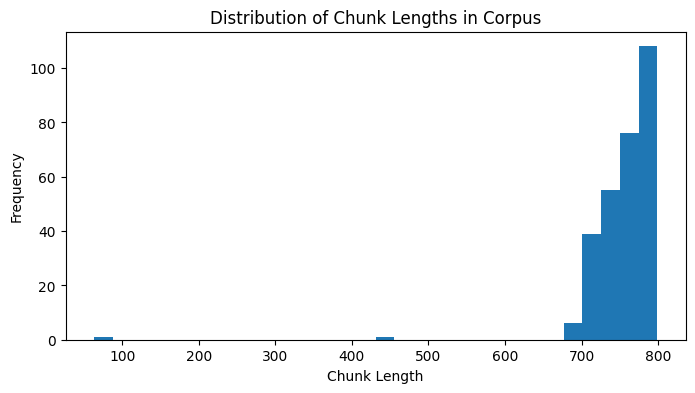

Each chunk represents a semantic unit of your internal data.


In [6]:
chunk_lengths = [len(chunk) for chunk in docs]
plt.figure(figsize=(8,4))
plt.hist(chunk_lengths, bins=30)
plt.title('Distribution of Chunk Lengths in Corpus')
plt.xlabel('Chunk Length')
plt.ylabel('Frequency')
plt.show()
print('Each chunk represents a semantic unit of your internal data.')

### RAG Query Interface

In [7]:
from itertools import chain
from langchain.chains import RetrievalQA
#from langchain.llms import Groq
from langchain.prompts import PromptTemplate

display(Markdown('##**Enterprise Knowledge Agent - Ask your Data'))
display(Markdown('###**You can now ask your Ai questions based on your private enterprise documents.'))

#Load FAISS vector store
vector_store = FAISS.load_local('enterprise_faiss_index',embeddings,allow_dangerous_deserialization=True)

#Build the retriever
ret = vector_store.as_retriever(search_kwargs={'k':4})

#Define the system prompt for better answers
system_prompt = '''
You are an intelligent Enterprise Knowledge assistant.
You have access to internal company documents, wiki pages, emails, spreadsheets, and secret files.
Answer user queries concisely and accurately with sources (if available).
If information is missing, say so confidentialy rather than making things up

{context}
'''

prompt_template = PromptTemplate(
    template=system_prompt + '\n\nQuestion: {question}\nAnswer:',
    input_variables=['context','question']
)
#Create RAG pipeline
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type='stuff',
    retriever=ret,
    chain_type_kwargs={'prompt':prompt_template},
    return_source_documents=True
)

#Example enterprise-level questions
questions = [
    'What are the main HR policies about leave or vacation?',
    'Summarize recent team meeting notes.',
    'Who is responsible for financial forecasting?',
    'What were the key decisions made in last months operations report?'

]

for q in questions:
  print(f'Question: {q}')
  result = qa_chain({'query':q})
  answer = result['result']
  sources = result.get('source_documents',[])
  print(f'Answer: {result["result"]}')

  if sources:
    print('Cited Sources:')
    for idx, doc in enumerate(sources[:3], 1):
      snippet = doc.page_content[:200].replace('\n', ' ')
      print(f'Source {idx}. {snippet}...')
  print('-'*80)

##**Enterprise Knowledge Agent - Ask your Data

###**You can now ask your Ai questions based on your private enterprise documents.

Question: What are the main HR policies about leave or vacation?


/tmp/ipython-input-20567166.py:49: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa_chain({'query':q})


Answer: Based on the provided internal company documents, I found the relevant information in the [FILE: Company-Policy-and-Procedure-June-1.18-V6.0.pdf] document.

According to the document, the main HR policies about leave or vacation are as follows:

1. **Temporary Employees**: Temporary employees are not eligible for benefits and are usually hired for a short period (less than six months) to supplement the workforce or help complete a specific project.
2. **Employee Leave Policy**: This policy is not explicitly mentioned in the provided document. However, it is likely that the company has a separate policy or procedure for employee leave, which may include vacation time, sick leave, and other types of leave.
3. **HIPAA Policy**: All employees working with patient data with access to patient information are required to sign our HIPAA compliance policy, which includes guidelines for maintaining patient confidentiality during leave or vacation.

To provide a more comprehensive answer,

### Interactive Query UI (Gradio with Fallback)

In [11]:
import csv
import time
import datetime
from datetime import datetime

LOG_DIR = 'logs'
os.makedirs(LOG_DIR, exist_ok=True)
LOG_FILE = os.path.join(LOG_DIR, 'query_logs.csv')

#Ensure a log file header
if not os.path.exists(LOG_FILE):
  with open(LOG_FILE, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['timestamp','user','query','answer','sources'])

def run_query(user='anonymous',query=''):
  '''Run the RetrievalQA qa_chain (expected to exist in the notebook).
  returns the answer_text, list of source snippets).
  '''

  if not query:
    return 'Please type a question.', []

  #BAsic safety check
  if 'qa_chain' not in globals():
    return "RAG pipeline ('qa_chain') not initialized. Run again", []

  try:
    res = qa_chain({'query':query})
    #Depending on chain implementation keys may vary
    answer = res.get('result') or res.get('output_text') or str(res)
    sources = res.get('source_documents') or res.get('source_documents',[]) or []

    #Format top source snippets
    top_snippets = []
    for doc in (sources[:4] if sources else []):
      snippet = getattr(doc, 'page_content', None) or getattr(doc, 'content',None) or str(doc)
      snippet = snippet.replace('\n', ' ').strip()
      src_meta = ''
      if hasattr(doc, 'metadata') and doc.metadata:
        meta = doc.metadata
        filename = meta.get('source') or meta.get('filenmae') or meta.get('file') or ''
        if filename:
          src_meta = f'(source: {filename})'
        top_snippets.append(snippet[:600] + '...' + src_meta)

      #Save to audit log
      timestamp = datetime.utcnow().isoformat()
      with open(LOG_FILE, 'a', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow([timestamp, user, query, answer.replace('\n',' '),'||| '.join(top_snippets)])
      return answer, top_snippets
  except Exception as e:
    return f'Error While running query: {e}',[]

#TRY to launch the gradio now
try:
  import gradio as gr

  def gradio_interface(user, question):
    answer, snippets = run_query(user=user or 'anonymous', query=question)
    #Return answer and a single formatted string of sources for display
    sources_combined = '\n\n'.join([f'{i+1}. {s}' for i, s in enumerate(snippets)]) if snippets else 'No sources found.'
    return answer, sources_combined

  with gr.Blocks(title='Enterprise Knowledge Agent') as demo:
    gr.Markdown('##**Enterprise Knowledge Agent**')
    with gr.Row():
      user_in = gr.Textbox(label='User (optional)', placeholder='Enter your username or role(e.g, alice@company.com)',lines=1)
      q_in = gr.Textbox(label='Question',placeholder='Ask something about your documents or company...',lines=2)

    btn = gr.Button('Ask')
    ans_out = gr.Textbox(label='Ai Answer',lines=10)
    src_out = gr.Textbox(label='Top Sources',lines=10)
    btn.click(fn=gradio_interface, inputs=[user_in, q_in], outputs=[ans_out, src_out])
    gr.Markdown('### Audit logs are saved locally in `/logs/query_logs.csv`')

  print('Launching Gradio interface (open the link that appears below.) If running in a remote environment, you may need to enable tunneling')
  demo.launch(share=False, debug=False)
except Exception as gr_err:
  #If gradio is not available or fails, fall back to a console loop
  print('Gradio UI not available, falling back to console interactive mode.')
  print('You can still ask questions via the input prompt. Logs will be saved to the directory')
  while True:
    try:
      user = input('\nEnter your username(or press Enter for guest): ').strip() or 'anonymous'
      q = input('Your Question (or type exit to stop): ').strip()
      if not q:
        print('Please enter a question or type exit to quit.')
        continue
      if q.lower() == 'exit':
        print('Exiting interactive mode.')
        break
      ans,srcs = run_query(user=user,query=q)
      print('\n===Ai Answer ===')
      print(ans)
      if srcs:
        print('\n===Top Sources===')
        for i, s in enumerate(srcs,1):
          print(f'{i}. {s}\n')
      else:
        print('\nNo sources were returned for this query.')
    except KeyboardInterrupt:
      print('\nInterrupted - exiting.')
      break

Launching Gradio interface (open the link that appears below.) If running in a remote environment, you may need to enable tunneling
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>